#  Data Cleaning

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline



# Sqlite zipfile

In [275]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""").fetchall()
q1 = """SELECT * FROM movie_basics ;"""
q2 = """ SELECT * FROM directors """
q3 = """SELECT *  FROM known_for """
q4 = """SELECT *  FROM movie_akas """
q5 = """ SELECT *  FROM movie_ratings"""
q6 = """ SELECT *  FROM persons"""
q7 = """  SELECT * FROM principals"""
q8 = """  SELECT * FROM writers"""

In [276]:
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [302]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie

#Remove all $ and commas for domestic gross, worldwide gross, and production budget

tn_movie["production_budget"]=tn_movie["production_budget"].map(lambda x: int(x.replace(',', '').replace('$', '')))
tn_movie["domestic_gross"]=tn_movie["domestic_gross"].map(lambda x: int(x.replace(',', '').replace('$', '')))
tn_movie["worldwide_gross"]=tn_movie["worldwide_gross"].map(lambda x: int(x.replace(',', '').replace('$', '')))


#Add ROI column - defined as (worldwide_gross - budget)/(worldwide_gross)
tn_movie["ROI"]= (tn_movie["worldwide_gross"]- tn_movie["production_budget"])/    \
         tn_movie["production_budget"]

#Add start year as int column

tn_movie["start_year"] = tn_movie["release_date"].map(lambda x: int(x[-4:]))

#Eliminate any worldwide gross columns that = 0

tn_movie = tn_movie [tn_movie .worldwide_gross != 0]

# tn_movie

In [290]:
q1 = """SELECT * FROM movie_basics ;"""
dfzip=pd.read_sql(q1, conn)
imdb_basics = pd.merge(left= dfzip ,right = tn_movie, left_on=["start_year","primary_title"], right_on=["start_year","movie"], \
                          how = 'inner')
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-0.998362
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,1.064409
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,1.218164
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,6.669092
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",100,"Dec 14, 2018",The Mule,50000000,103804407,170857676,2.417154
1418,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",8,"Jul 20, 2018",Teefa in Trouble,1500000,0,98806,-0.934129
1419,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",78,"Feb 13, 2019",Happy Death Day 2U,9000000,28051045,64179495,6.131055
1420,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,"Sep 21, 2018",Fahrenheit 11/9,5000000,6352306,6653715,0.330743


In [282]:
imdb_basics=imdb_basics.dropna(subset=['genres']) #Getting rid of rows with 'none' genres

In [283]:
[imdb_basics['start_year']>=2012] #Only using dates from to 2012 and up

[0        True
 1        True
 2        True
 3        True
 4       False
         ...  
 1417     True
 1418     True
 1419     True
 1420     True
 1421     True
 Name: start_year, Length: 1418, dtype: bool]

In [ ]:
imdb_basics.info() #info check

In [ ]:
imdb_basics['release_date'] = imdb_basics['release_date'].astype(str) #changing date back into str so that I can make 
#a new column with the abbreviated month 

In [293]:
imdb_basics["month"] = imdb_basics["release_date"].map(lambda x: str(x[:4])) # Using lambda to only grab abbreviated the month
#to make the new month column

In [294]:
imdb_basics.head() #checking to see if column is there

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-0.998362,Dec
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,1.064409,Dec
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,1.218164,Sep
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,6.669092,Jun
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-0.521228,Oct


In [295]:
imdb_basics['month'].value_counts() #checking for unique values

Oct     155
Dec     149
Nov     146
Sep     142
Mar     125
Jul     120
Aug     118
Jun     117
Apr     100
May      96
Feb      86
Jan      68
Name: month, dtype: int64

In [296]:
roi_by_month = [imdb_basics[imdb_basics['month'] =='Jan ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Feb ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Mar ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Apr ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'May ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Jun ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Jul ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Aug ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Sep ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Oct ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Nov ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Dec ']['ROI'].mean()]
print(roi_by_month) 
#Taking the Roi of each month and using mean to get the average

[4.192346904409753, 3.047069203980646, 2.0122017444677778, 2.2756161019345056, 2.420606921637944, 2.748313619471658, 7.224058690645137, 2.236442956415213, 2.053771074850857, 3.403080072908126, 2.427269286027826, 2.026163207568841]


In [297]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #new list for bar graph

In [289]:
imdb_basics.info() #another check!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1418 non-null   object 
 1   primary_title      1418 non-null   object 
 2   original_title     1418 non-null   object 
 3   start_year         1418 non-null   int64  
 4   runtime_minutes    1407 non-null   float64
 5   genres             1418 non-null   object 
 6   id                 1418 non-null   int64  
 7   release_date       1418 non-null   object 
 8   movie              1418 non-null   object 
 9   production_budget  1418 non-null   int64  
 10  domestic_gross     1418 non-null   int64  
 11  worldwide_gross    1418 non-null   int64  
 12  ROI                1418 non-null   float64
 13  month              1418 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 166.2+ KB


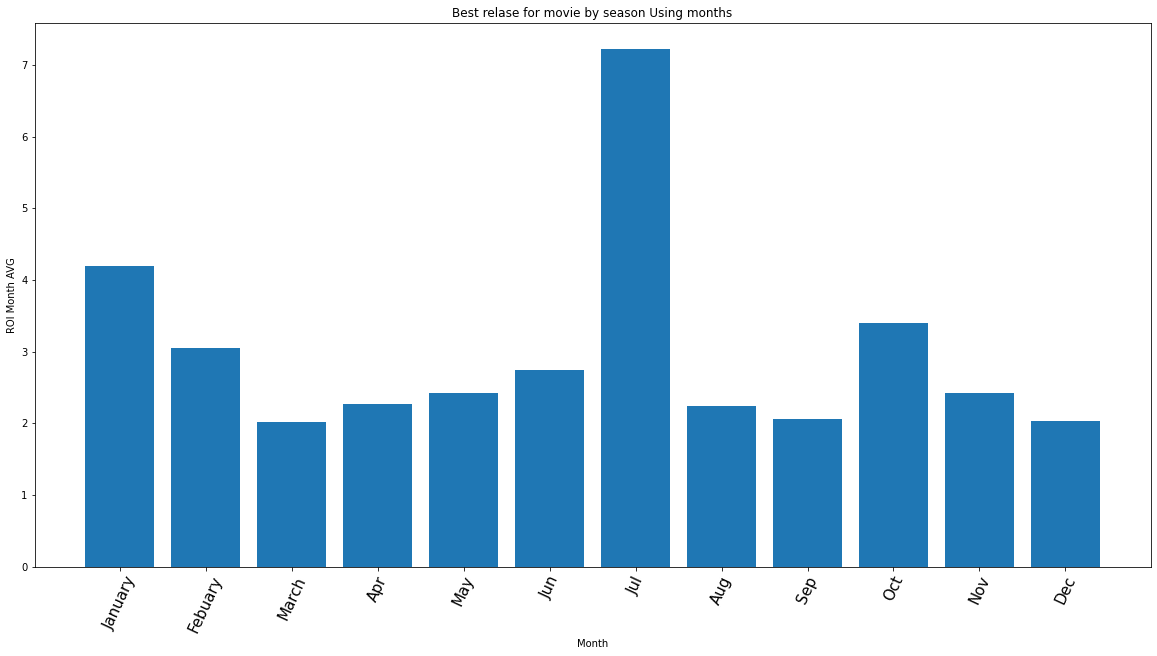

In [303]:
fig, ax = plt.subplots(figsize = (20,10))
x = months
y = roi_by_month
ax.bar(x,y)
plt.xticks(fontsize = 15, rotation = 65)
ax.set_xlabel("Month")
ax.set_ylabel("ROI Month AVG")
ax.set_title("Best relase for movie by season Using months");       #Graphing to see the connection between month ROI to see 
# which is the best month to release a movie 